In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
car_df = pd.read_csv("../datasets/Geri_data/sales-cars.csv", index_col=0, parse_dates=True)
car_df.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


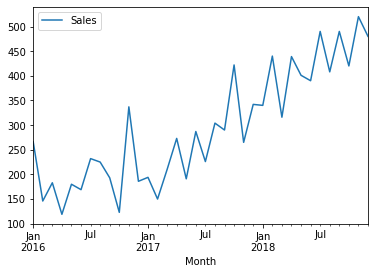

In [4]:
car_df.plot()
plt.show()

In [5]:
diff_car_df = car_df.diff(periods=1)
diff_car_df = diff_car_df[1:]
diff_car_df.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


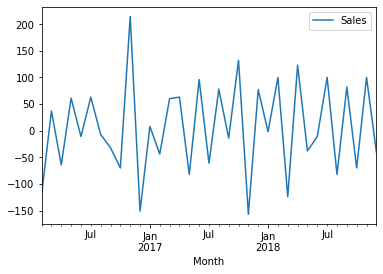

In [6]:
diff_car_df.plot()
plt.show()

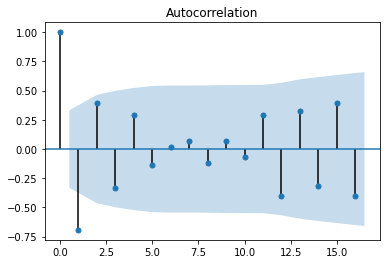

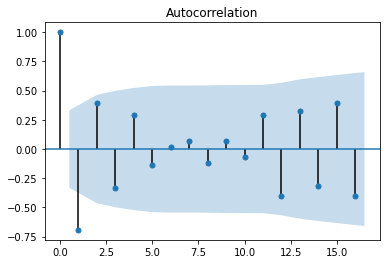

In [7]:
plot_acf(diff_car_df)

In [8]:
X = car_df.values
train = X[:int(len(X)*0.8)]
test = X[int(len(X)*0.8):]

In [9]:
model_ar = AutoReg(train, lags=3)
model_ar_fitted = model_ar.fit()
predictions_ar = model_ar_fitted.predict(start=28, end=36)

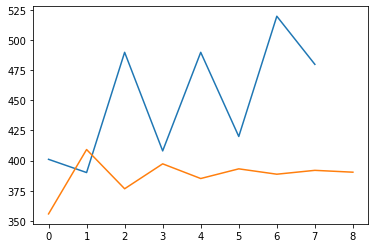

In [10]:
plt.plot(test)
plt.plot(predictions_ar)
plt.show()

In [11]:
model_arima = ARIMA(train, order=(3,1,1))
model_arima_fitted = model_arima.fit()
predictions_arima = model_arima_fitted.predict(start=28, end=36)

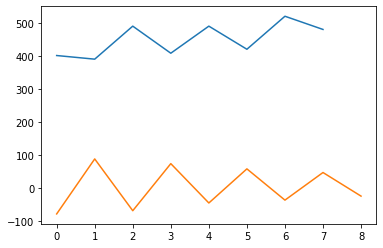

In [12]:
plt.plot(test)
plt.plot(predictions_arima)
plt.show()

In [13]:
len(train)

28

In [14]:
len(test)

8